In [1]:
# import required libraries and modules
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
# load dataset 
dataset = pd.read_csv('ClaMP_Integrated.csv')

# analyze the dataset
dataset

,e_cblp,e_cp,e_cparhdr,e_maxalloc,e_sp,e_lfanew,NumberOfSections,CreationYear,FH_char0,FH_char1,...,sus_sections,non_sus_sections,packer,packer_type,E_text,E_data,filesize,E_file,fileinfo,class
0,144,3,4,65535,184,128,8,1,0,1,...,3,5,0,NoPacker,6.530803,1.107119,2974071,5.854144,0,0
1,144,3,4,65535,184,128,5,1,1,1,...,0,5,1,VideoLanClient,6.555146,4.123266,26440904,7.993374,1,0
2,144,3,4,65535,184,128,8,1,0,1,...,3,5,0,NoPacker,6.610184,2.428137,541683,6.566081,0,0
3,144,3,4,65535,184,128,6,1,0,1,...,1,5,0,NoPacker,6.632689,1.913984,260096,6.656836,0,0
4,144,3,4,65535,184,240,4,1,1,1,...,0,4,0,NoPacker,6.727070,7.963265,195072,6.867009,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5205,144,3,4,65535,184,200,2,1,1,1,...,0,2,1,PECompactV2XBitsumTechnologies,7.997171,0.000000,137216,7.929623,0,1
5206,144,3,4,65535,184,256,9,1,0,1,...,5,4,0,NoPacker,7.998838,0.081539,862720,7.984551,1,1
5207,144,3,4,65535,184,248,11,1,0,1,...,7,4,0,NoPacker,7.999070,0.264678,865280,7.978608,0,1
5208,144,3,4,65535,184,232,11,1,0,1,...,7,4,0,NoPacker,7.999131,0.244351,854016,7.983393,0,1


In [3]:
# drop columns which cannot be processed 
columns_to_drop = ['class', 'packer_type']
attributes = dataset.drop(columns_to_drop, axis = 1)

# split the results column into another dataset
results = dataset['class']

In [4]:
# split dataset into Testing and Training
# 80% training, 20% testing
train_att, test_att, train_res, test_res = train_test_split(attributes, results, test_size=0.2)

n_estimators:  5, accuracy: 98.75239923224568
n_estimators: 15, accuracy: 99.04030710172745
n_estimators: 25, accuracy: 99.1362763915547
n_estimators: 35, accuracy: 99.1362763915547
n_estimators: 45, accuracy: 99.23224568138195
n_estimators: 55, accuracy: 99.32821497120922
n_estimators: 65, accuracy: 99.23224568138195
n_estimators: 75, accuracy: 99.32821497120922
n_estimators: 85, accuracy: 99.32821497120922
n_estimators: 95, accuracy: 99.32821497120922


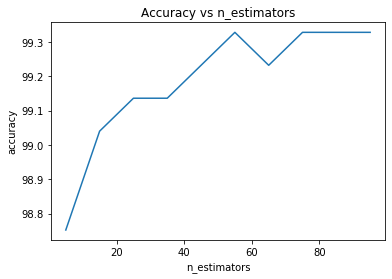

In [5]:
# use RandomForestClassifier to predict if a program is legitimate
agg_acc = []

min_range = 5
max_range = 100
for i in range(min_range, max_range+1, 10):
    rand_for_cls  = RandomForestClassifier(n_estimators=i, random_state=101)
    rand_for_cls.fit(train_att, train_res)
    modelScore = rand_for_cls.score(test_att, test_res) * 100
    print('n_estimators: {:2d}, accuracy: {}'.format(i, modelScore))
    agg_acc.append(modelScore)

# visualizing accuracy with each n_estimators change
plt.plot(range(min_range, max_range+1, 10), agg_acc)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.title('Accuracy vs n_estimators')
plt.show()

In [6]:
rand_for_cls  = RandomForestClassifier(n_estimators=50, random_state=0)
rand_for_cls.fit(train_att, train_res)

modelScore = rand_for_cls.score(test_att, test_res) * 100
print ("The model score is", modelScore)

The model score is 99.1362763915547
